In [1202]:
import numpy as np 
import matplotlib.pyplot as plt 

In [1203]:
class PhotonPacket():
    def __init__(
        self, 
        N=1, # number of packets
        position = (0.5, 0), # initial positions
        boxsize = (1,1) 
    ):
        
        self.position = [np.array([[position[0]], [position[1]]]) for _ in range(N)]
        self.N = N
        self.boxsize = boxsize
        
    def optical_depth(self):
        return -np.log(np.random.random())
    
    def direction(self):
        theta = 2*np.pi*np.random.random() #np.arccos(2 * np.random.random() - 1)
        return theta
    
    def scatter_event_distance(self):
        tau = self.optical_depth()
        r = np.exp(-tau)
        return r

    def move(self):
        for i in range(self.N): 
            while self.position[i][0, -1] <= self.boxsize[0] and self.position[i][1, -1] <= self.boxsize[1] and self.position[i][0, -1] >= 0 and self.position[i][1, -1] >= 0:
                
                r = self.scatter_event_distance()
                theta = self.direction()
                self.position[i] = np.append(self.position[i], [[self.position[i][0,-1] + r * np.cos(theta)], [self.position[i][1,-1] +r * np.sin(theta)]], axis=1)


In [1204]:
N = 10
boxsize = (10,10)
initial = (boxsize[0]/2, boxsize[1]/2)

In [1205]:
Photon = PhotonPacket(N = N, boxsize=(10,10), position=initial)
Photon.move()

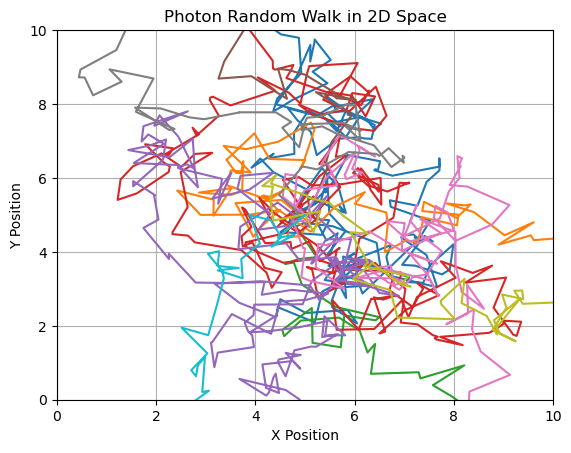

In [1206]:
plt.figure()
for i in range(N):
    plt.plot(Photon.position[i][0, :], Photon.position[i][1, :])
plt.xlim(0, boxsize[0])
plt.ylim(0, boxsize[1])
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Photon Random Walk in 2D Space')
plt.grid()
plt.show()